# Carla Town Dataset
We ran the autopilot in Town01 for over 900 episodes of 100 seconds each in the presence of 100 other vehicles, and recorded the trajectory of every vehicle and the autopilot’s LIDAR observation. We randomized
episodes to either train, validation, or test sets. We created sets of 60,701 train, 7586 validation, and 7567 test scenes,
each with 2 seconds of past and 4 seconds of future position information at 5Hz. The dataset also includes 100 episodes
obtained by following the same procedure in Town02. We used this data to further evaluate our ESP model. We applied our saved models (the same models used to report results in the paper) to this data. We generated the CARLA
data using version 0.8.4. We used the default vehicle. We used a LIDAR position of (0.0, 0.0, 2.5), with 32 channels, a range of 50, 100,000 points per second, a rotation frequency of 10, an upper FOV limit of 10, and a lower FOV limit of −30. We will release the 100GB of collected data.

In [83]:
%load_ext autoreload
%autoreload 2
# Import the data loader.
import carla_json_loader as cjl
# print(help(cjl))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
# Set the root path to the training/val/test set.
data_root = '/media/tynguyen/docker_folder/autonomous_driving/carla01/test/'

In [92]:
# Set the datum filename
fn = data_root + 'ma_datum_00000010.json'

In [93]:
# Load the datum
help(cjl.load_json)
datum = cjl.load_json(fn)
"""
overhead_features format:
The overhead_features is a very simple featurization of the 3D LIDAR point cloud. I did not put much effort into tuning this representation. Nonetheless, here's the format:

Channel 0: Histogram of all points in each cell (for all heights)
Channel 1: Histogram of points above ground z-threshold
Channel 2: Histogram of points below ground z-threshold
Channel 3: Histogram of points above a higher z-threshold

The z-thresholds are listed here: https://github.com/nrhine1/deep_imitative_models/blob/00419760f50ca0800be7a95716d75a5cf421867f/dim/env/preprocess/carla_preprocess.py#L611-L613

They are -4.5, and -2.0 in the coordinate frame of the LIDAR sensor.
"""

Help on function load_json in module carla_json_loader:

load_json(json_fn)
    Load a json datum.
    
    :param json_fn: <str> the path to the json datum.
    :returns: dict of postprocess json data.



"\noverhead_features format:\nThe overhead_features is a very simple featurization of the 3D LIDAR point cloud. I did not put much effort into tuning this representation. Nonetheless, here's the format:\n\nChannel 0: Histogram of all points in each cell (for all heights)\nChannel 1: Histogram of points above ground z-threshold\nChannel 2: Histogram of points below ground z-threshold\nChannel 3: Histogram of points above a higher z-threshold\n\nThe z-thresholds are listed here: https://github.com/nrhine1/deep_imitative_models/blob/00419760f50ca0800be7a95716d75a5cf421867f/dim/env/preprocess/carla_preprocess.py#L611-L613\n\nThey are -4.5, and -2.0 in the coordinate frame of the LIDAR sensor.\n"

In [81]:
# Investigate datum
"""datum.keys():
dict_keys(['lidar_params', 'agent_transforms', 'player_transform', 'agent_futures', 'player_past', 'player_future', 'agent_pasts', 'overhead_features'])
"""
# datum['agent_transforms']

"datum.keys():\ndict_keys(['lidar_params', 'agent_transforms', 'player_transform', 'agent_futures', 'player_past', 'player_future', 'agent_pasts', 'overhead_features'])\n"

Help on function plot_datum in module carla_json_loader:

plot_datum(datum, meters_max=50, fig_size=(20, 20), feature_cmap='Reds')
    Plot a loaded datum by displaying each agent's past and future positions overlaid upon each channel of the BEV.
    
    :param datum: the loaded datum (the return from load_json())
    :param meters_max: the half-width of each plot in meters
    :param feat_cmap (str): color map for overhead features 
    :returns: the Matplotlib Figure



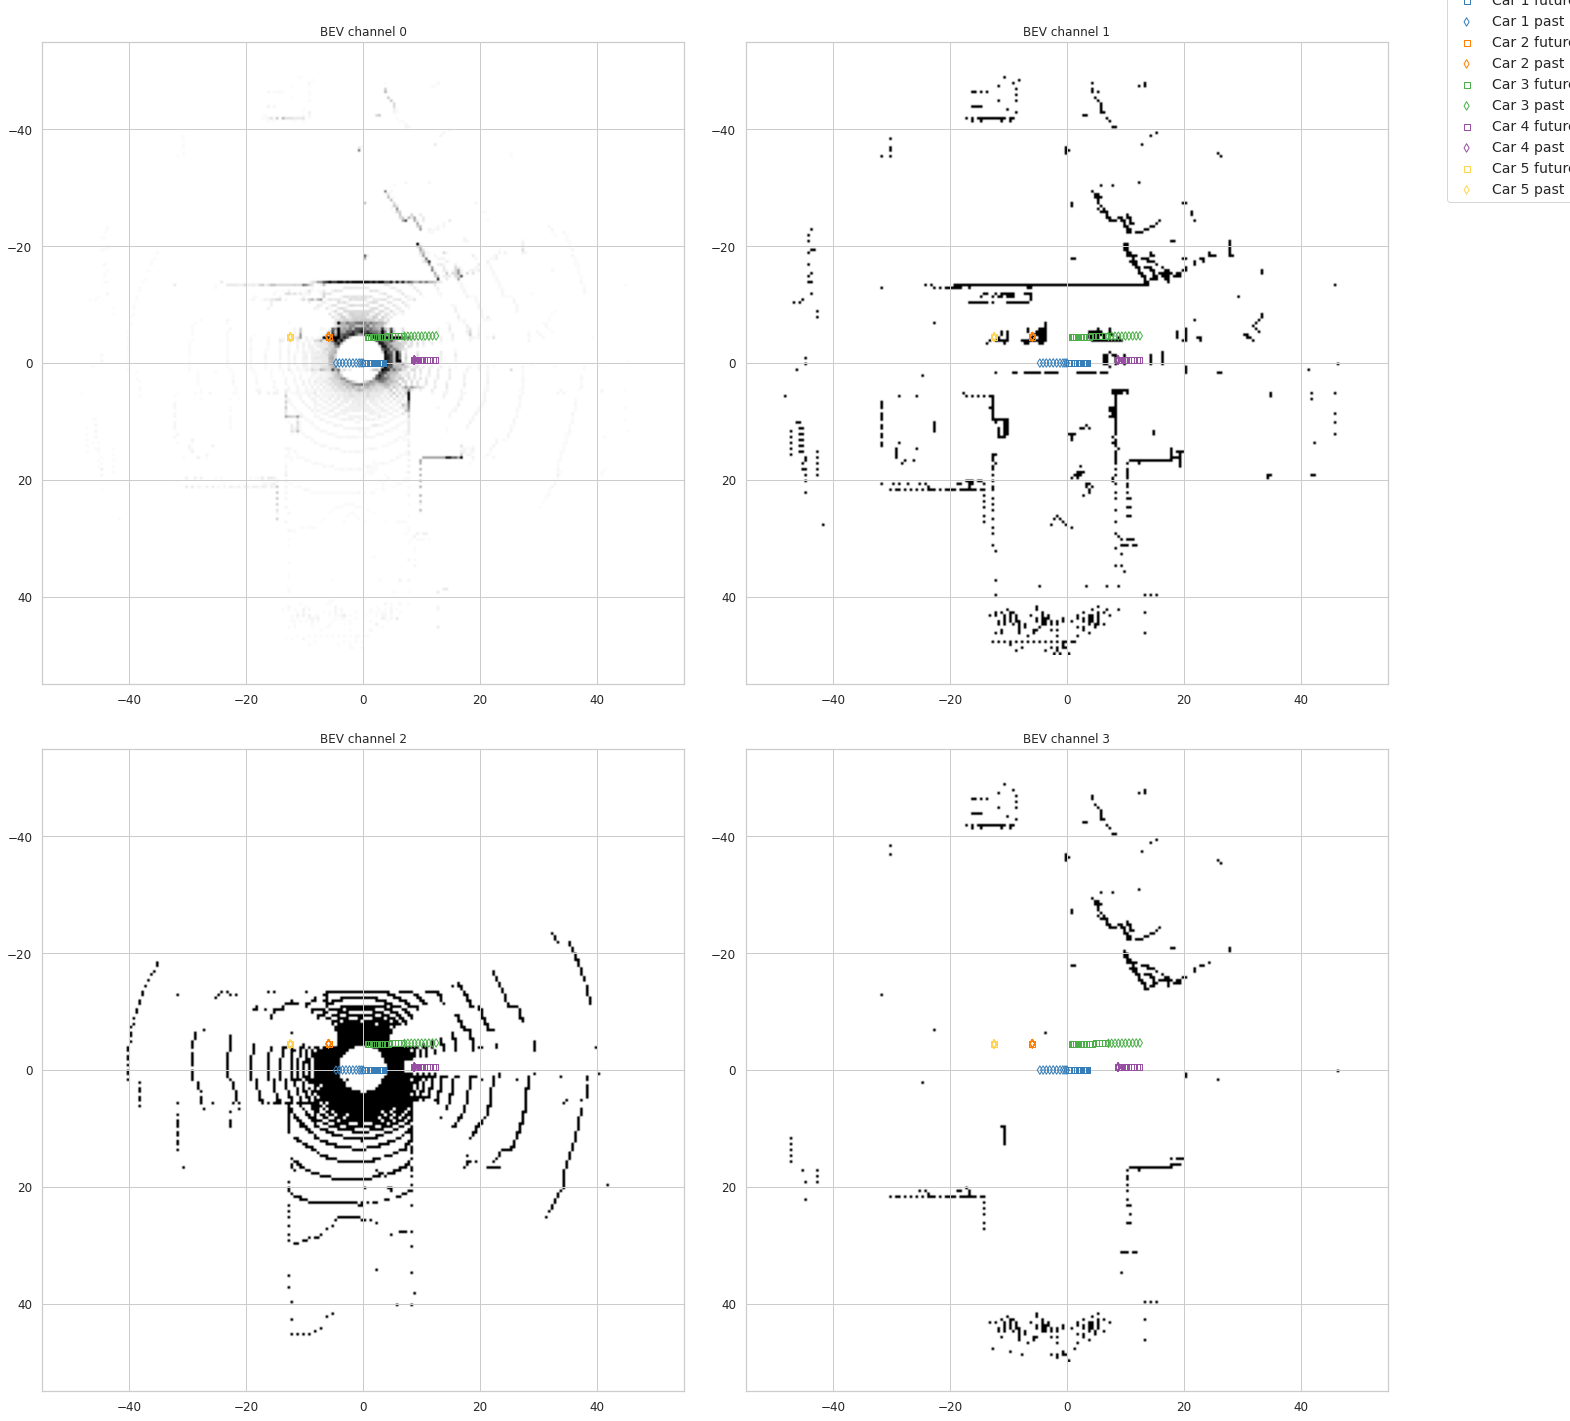

In [94]:
# Plot all agent pasts and futures on each channel of the BEV, setting the view window to be 55*2 meters wide
help(cjl.plot_datum)
fig = cjl.plot_datum(datum, meters_max=55, fig_size=(20,20), feature_cmap='Greys')

Help on function plot_datum in module carla_json_loader:

plot_datum(datum, meters_max=50)
    Plot a loaded datum by displaying each agent's past and future positions overlaid upon each channel of the BEV.
    
    :param datum: the loaded datum (the return from load_json())
    :param meters_max: the half-width of each plot in meters
    :returns: the Matplotlib Figure



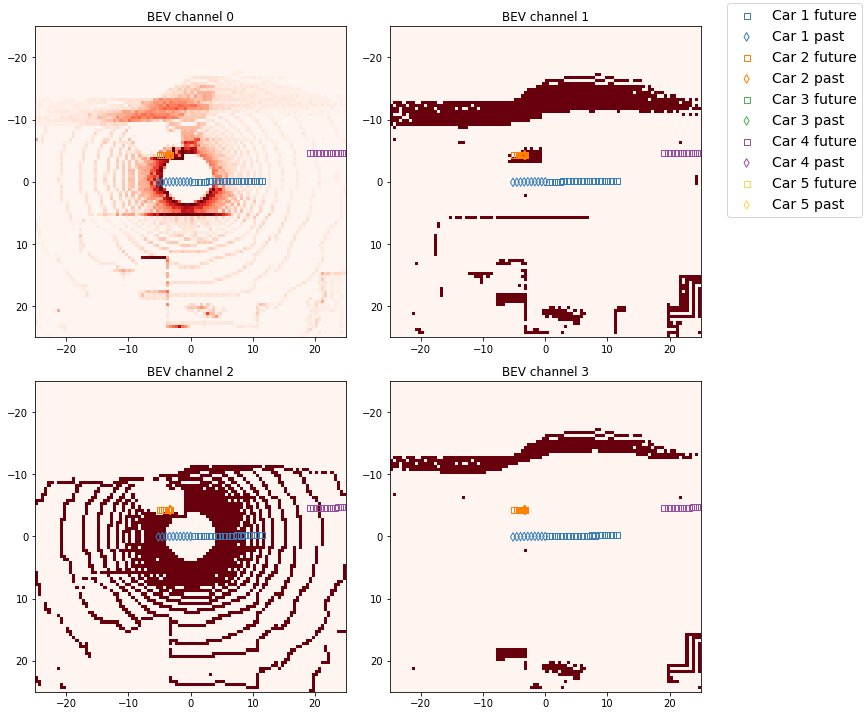

In [6]:
# Plot all agent pasts and futures on each channel of the BEV, setting the view window to be 25*2 meters wide
help(cjl.plot_datum)
fig = cjl.plot_datum(datum, 25)